# EDA

Imports

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import random

### Statistieken van widths and heights

In [2]:
def get_images(painter):
    images = []
    for filename in os.listdir(painter):
        if filename.endswith('.jpg'):
            filename = os.path.join(painter, filename)
            images.append(filename)
    return images

def get_widths_heights(images):
    widths = []
    heights = []
    for image in images:
        with Image.open(image) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    return widths, heights

In [3]:
images_dir = "images"
painter_dirs = os.listdir(images_dir)
widths_mondriaan, heights_mondriaan = get_widths_heights(get_images("images/Mondriaan"))
widths_picasso, heights_picasso = get_widths_heights(get_images("images/Picasso"))
widths_rembrandt, heights_rembrandt = get_widths_heights(get_images("images/rembrandt"))
widths_rubens, heights_rubens = get_widths_heights(get_images("images/Rubens"))

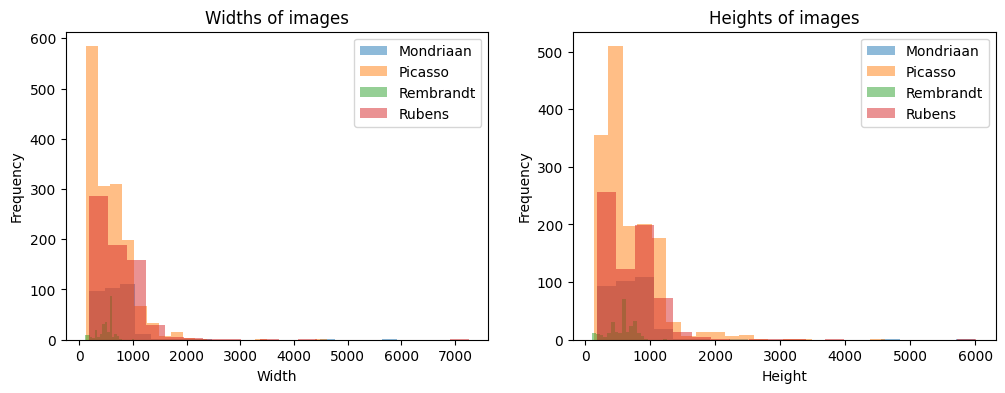

In [4]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(widths_mondriaan, bins=20, alpha=0.5, label='Mondriaan')
axes[0].hist(widths_picasso, bins=20, alpha=0.5, label='Picasso')
axes[0].hist(widths_rembrandt, bins=20, alpha=0.5, label='Rembrandt')
axes[0].hist(widths_rubens, bins=20, alpha=0.5, label='Rubens')
axes[0].legend()
axes[0].set_title('Widths of images')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')

axes[1].hist(heights_mondriaan, bins=20, alpha=0.5, label='Mondriaan')
axes[1].hist(heights_picasso, bins=20, alpha=0.5, label='Picasso')
axes[1].hist(heights_rembrandt, bins=20, alpha=0.5, label='Rembrandt')
axes[1].hist(heights_rubens, bins=20, alpha=0.5, label='Rubens')
axes[1].legend()
axes[1].set_title('Heights of images')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency');


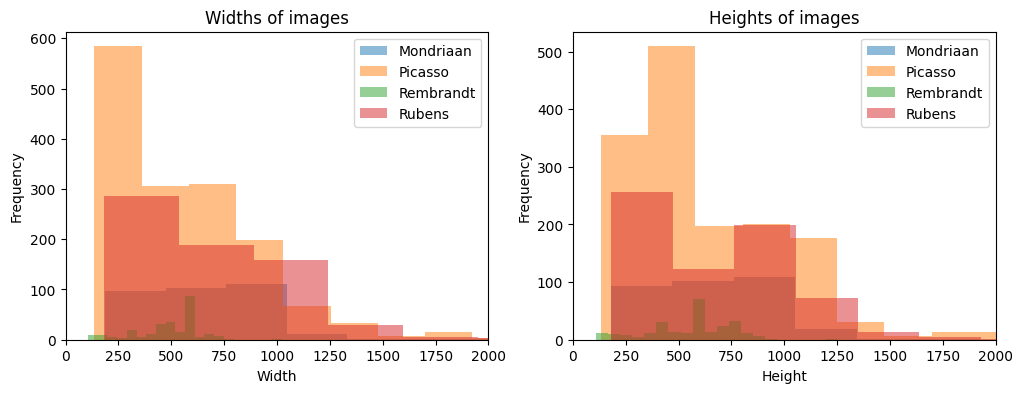

In [5]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(widths_mondriaan, bins=20, alpha=0.5, label='Mondriaan')
axes[0].hist(widths_picasso, bins=20, alpha=0.5, label='Picasso')
axes[0].hist(widths_rembrandt, bins=20, alpha=0.5, label='Rembrandt')
axes[0].hist(widths_rubens, bins=20, alpha=0.5, label='Rubens')
axes[0].legend()
axes[0].set_title('Widths of images')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 2000)

axes[1].hist(heights_mondriaan, bins=20, alpha=0.5, label='Mondriaan')
axes[1].hist(heights_picasso, bins=20, alpha=0.5, label='Picasso')
axes[1].hist(heights_rembrandt, bins=20, alpha=0.5, label='Rembrandt')
axes[1].hist(heights_rubens, bins=20, alpha=0.5, label='Rubens')
axes[1].legend()
axes[1].set_title('Heights of images')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 2000);

In [6]:
total_widths = widths_mondriaan + widths_picasso + widths_rembrandt + widths_rubens
total_heights = heights_mondriaan + heights_picasso + heights_rembrandt + heights_rubens

df = pd.DataFrame({'widths': total_widths, 'heights': total_heights})
stats = df.describe()
stats.loc["median"] = df.median()
stats

,widths,heights
count,2797.000000,2797.000000
mean,603.319271,648.314623
std,415.975788,446.883172
min,106.000000,108.000000
25%,314.000000,383.000000
50%,550.000000,590.000000
75%,800.000000,826.000000
max,7264.000000,6017.000000
median,550.000000,590.000000


In [7]:
stats.to_csv('image_dimensions.csv')

## Schilderijen bekijken

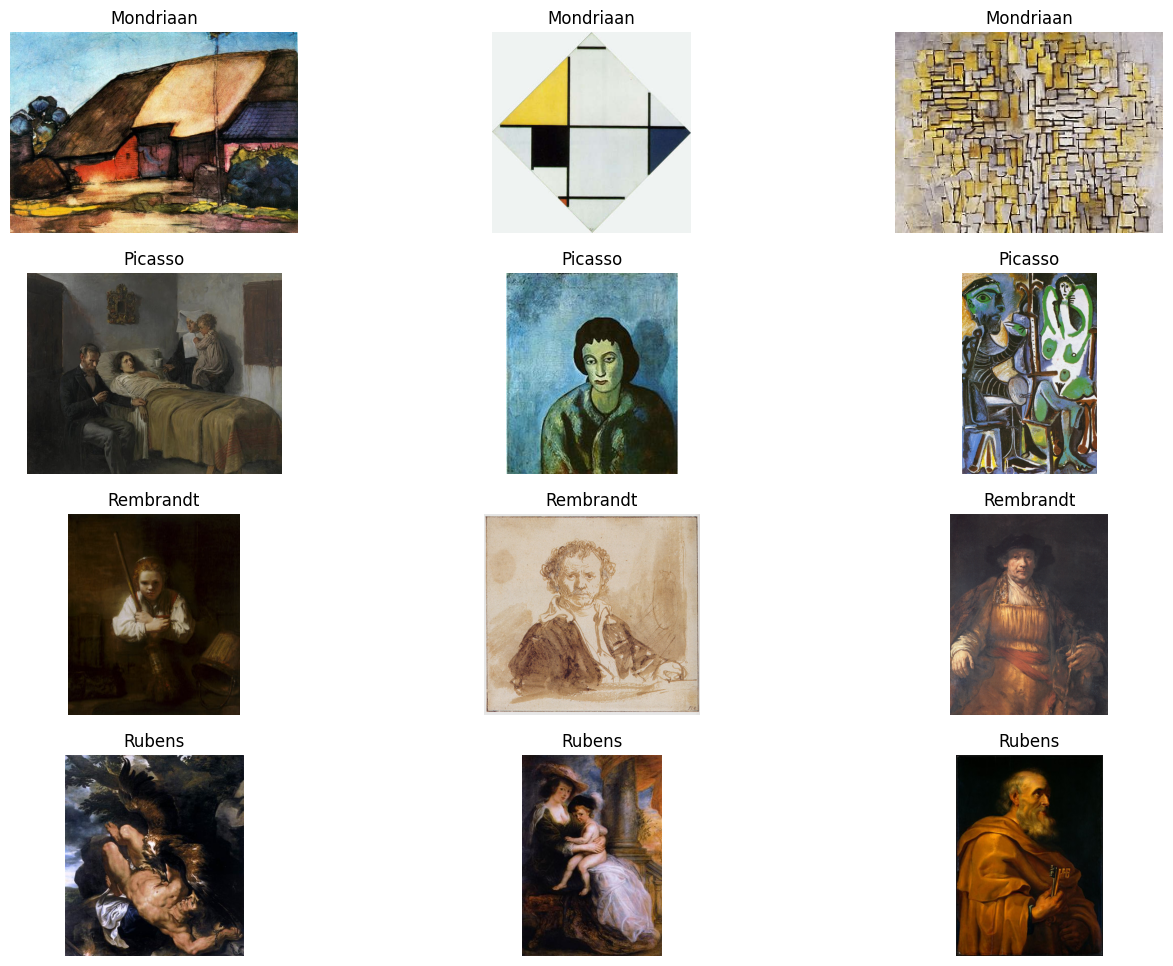

In [8]:
columns = 3
_, axes = plt.subplots(4, columns, figsize=(16, 12))

for painter in painter_dirs:
    for col in range(columns):
        images = get_images(os.path.join(images_dir, painter))
        image = random.choice(images)
        with Image.open(image) as img:
            axes[painter_dirs.index(painter), col].imshow(img)
            axes[painter_dirs.index(painter), col].set_title(painter)
            axes[painter_dirs.index(painter), col].axis('off')